In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
# show graphs in jupyter
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# display all columns/rows and what's inside
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
# https://towardsdatascience.com/multi-label-text-classification-5c505fdedca8#--responses
import matplotlib.pyplot as plt

import numpy
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
from sklearn.svm import SVC
from skmultilearn.dataset import load_dataset
from skmultilearn.ext import Keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# list of metrics
Evals = []

# 3. Multi-Label Classification


In [4]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("bibtex.csv") 
# Preview the first 5 lines of the loaded data 
print(data.shape)
# X_train, y_train
y = data.iloc[:,-159:]
X = data.iloc[:,:-159]
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

(7395, 1995)


## 3.1. Multiple Binary Classifications - (Binary Relevance)


### 3.1.1  BinaryRelevance MLP

In [5]:
def create_model_single_class(input_dim, output_dim):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

KERAS_PARAMS = dict(epochs=10, batch_size=100, verbose=0)
clf = BinaryRelevance(classifier=Keras(create_model_single_class, False, KERAS_PARAMS), require_dense=[True,True])
clf.fit(X_train, y_train)
result = clf.predict(X_test)

In [14]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,result.toarray())
Micro_Precision = precision_score(y_test,result, average='micro')
Micro_Recall = recall_score(y_test,result, average='micro')
Micro_F1 = f1_score(y_test,result, average='micro')
Micro_Average_Prec = average_precision_score(y_test, result.toarray(), average='micro')
Macro_Precision = precision_score(y_test,result, average='macro')
Macro_Recall = recall_score(y_test,result, average='macro')
Macro_F1 = f1_score(y_test,result, average='macro')
Macro_Average_Prec = average_precision_score(y_test, result.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, result.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, result.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,result)
Ranking_loss = label_ranking_loss(y_test, result.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), result)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), result.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, result.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, result.toarray())
Jaccard_score = jaccard_score(y_test, result.toarray(), average='samples')
Jaccard_score_macro = jaccard_score(y_test, result.toarray(), average='macro')
print("BinaryReMLP Accuracy = ",Accuracy)
print("BinaryReMLP Micro_Precision = ",Micro_Precision)
print("BinaryReMLP Micro_Recall = ",Micro_Recall)
print("BinaryReMLP Micro_F1 = ",Micro_F1)
print("BinaryReMLP Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReMLP Macro_Precision = ",Macro_Precision)
print("BinaryReMLP Macro_Recall = ",Macro_Recall)
print("BinaryReMLP Macro_F1 = ",Macro_F1)
print("BinaryReMLP Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReMLP Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReMLP Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReMLP Hamming_loss = ",Hamming_loss)
print("BinaryReMLP Ranking_loss = ",Ranking_loss)
print("BinaryReMLP Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReMLP Coverage_error = ",Coverage_error)
print("BinaryReMLP label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReMLP Jaccard_score = ",Jaccard_score)
print("BinaryReMLP Jaccard_score_macro = ",Jaccard_score_macro)
Eval1 = ['BinaryReMLP',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval1)

BinaryReMLP Accuracy =  0.1134780827529701
BinaryReMLP Micro_Precision =  0.8082397003745319
BinaryReMLP Micro_Recall =  0.1873263888888889
BinaryReMLP Micro_F1 =  0.30415785764622977
BinaryReMLP Micro_Average_Prec =  0.16346535837795306
BinaryReMLP Macro_Precision =  0.22059044196806224
BinaryReMLP Macro_Recall =  0.08294278599552772
BinaryReMLP Macro_F1 =  0.10673218223351229
BinaryReMLP Macro_Average_Prec =  0.07785065059387306
BinaryReMLP Samples_Average_Prec =  0.22249899612950635
BinaryReMLP Weighted_Average_Prec =  0.17691441135225322
BinaryReMLP Hamming_loss =  0.012720325467189186
BinaryReMLP Ranking_loss =  0.7795546833154263
BinaryReMLP Micro_Roc_auc =  0.5933284305183959
BinaryReMLP Coverage_error =  139.92707906595658
BinaryReMLP label_ranking_average_precision_score =  0.22249899612951013
BinaryReMLP Jaccard_score =  0.2130001513348502
BinaryReMLP Jaccard_score_macro =  0.07598187610958645


### 3.1.2  BinaryRelevance SVM

In [15]:
# initialize Binary Relevance multi-label classifier
# with an SVM classifier  # SVM in scikit only supports the X matrix in sparse representation
# Setup the classifier
classifier = BinaryRelevance(classifier=SVC(), require_dense=[False,True])
# Train
classifier.fit(X_train, y_train)
# Predict
y_pred = classifier.predict(X_test)

In [24]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
# In multilabel classification, this function computes subset_accuracy:
Accuracy = accuracy_score(y_test,y_pred)  
Micro_Precision = precision_score(y_test,y_pred, average='micro')
Micro_Recall = recall_score(y_test,y_pred, average='micro')
Micro_F1 = f1_score(y_test,y_pred, average='micro')
Micro_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='micro')
Macro_Precision = precision_score(y_test,y_pred, average='macro')
Macro_Recall = recall_score(y_test,y_pred, average='macro')
Macro_F1 = f1_score(y_test,y_pred, average='macro')
Macro_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,y_pred)
Ranking_loss = label_ranking_loss(y_test, y_pred.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, y_pred.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, y_pred.toarray())
Jaccard_score = jaccard_score(y_test, y_pred, average='samples')
Jaccard_score_macro = jaccard_score(y_test, y_pred, average='macro')
print("BinaryReSVC Accuracy = ",Accuracy)
print("BinaryReSVC Micro_Precision = ",Micro_Precision)
print("BinaryReSVC Micro_Recall = ",Micro_Recall)
print("BinaryReSVC Micro_F1 = ",Micro_F1)
print("BinaryReSVC Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReSVC Macro_Precision = ",Macro_Precision)
print("BinaryReSVC Macro_Recall = ",Macro_Recall)
print("BinaryReSVC Macro_F1 = ",Macro_F1)
print("BinaryReSVC Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReSVC Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReSVC Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReSVC Hamming_loss = ",Hamming_loss)
print("BinaryReSVC Ranking_loss = ",Ranking_loss)
print("BinaryReSVC Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReSVC Coverage_error = ",Coverage_error)
print("BinaryReSVC label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReSVC Jaccard_score = ",Jaccard_score)
print("BinaryReSVC Jaccard_score_macro = ",Jaccard_score_macro)
Eval2 = ['BinaryReSVC',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval2)

BinaryReSVC Accuracy =  0.05325686194182712
BinaryReSVC Micro_Precision =  0.9980988593155894
BinaryReSVC Micro_Recall =  0.09114583333333333
BinaryReSVC Micro_F1 =  0.16703786191536746
BinaryReSVC Micro_Average_Prec =  0.10446068349885623
BinaryReSVC Macro_Precision =  0.018693221523410204
BinaryReSVC Macro_Recall =  0.0137405944777599
BinaryReSVC Macro_F1 =  0.015401072275492318
BinaryReSVC Macro_Average_Prec =  0.027157625635116985
BinaryReSVC Samples_Average_Prec =  0.12031398322973844
BinaryReSVC Weighted_Average_Prec =  0.10808709186492581
BinaryReSVC Hamming_loss =  0.013490707746850837
BinaryReSVC Ranking_loss =  0.8931741479877491
BinaryReSVC Micro_Roc_auc =  0.5455716089950805
BinaryReSVC Coverage_error =  150.5854158131913
BinaryReSVC label_ranking_average_precision_score =  0.12031398322974057
BinaryReSVC Jaccard_score =  0.10682585201225103
BinaryReSVC Jaccard_score_macro =  0.013711173763223212


### 3.1.3  BinaryRelevance GaussianNB

In [25]:
#Binary Relevance GaussianNB
BinaryReGaussianNB = BinaryRelevance(GaussianNB())
BinaryReGaussianNB.fit(X_train,y_train)
br_predictions = BinaryReGaussianNB.predict(X_test)

In [28]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,br_predictions.toarray())
Micro_Precision = precision_score(y_test,br_predictions, average='micro')
Micro_Recall = recall_score(y_test,br_predictions, average='micro')
Micro_F1 = f1_score(y_test,br_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,br_predictions, average='macro')
Macro_Recall = recall_score(y_test,br_predictions, average='macro')
Macro_F1 = f1_score(y_test,br_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,br_predictions)
Ranking_loss = label_ranking_loss(y_test, br_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), br_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), br_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, br_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, br_predictions.toarray())
Jaccard_score = jaccard_score(y_test, br_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, br_predictions, average='macro')
print("BinaryReGaussianNB Accuracy = ",Accuracy)
print("BinaryReGaussianNB Micro_Precision = ",Micro_Precision)
print("BinaryReGaussianNB Micro_Recall = ",Micro_Recall)
print("BinaryReGaussianNB Micro_F1 = ",Micro_F1)
print("BinaryReGaussianNB Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReGaussianNB Macro_Precision = ",Macro_Precision)
print("BinaryReGaussianNB Macro_Recall = ",Macro_Recall)
print("BinaryReGaussianNB Macro_F1 = ",Macro_F1)
print("BinaryReGaussianNB Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReGaussianNB Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReGaussianNB Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReGaussianNB Hamming_loss = ",Hamming_loss)
print("BinaryReGaussianNB Ranking_loss = ",Ranking_loss)
print("BinaryReGaussianNB Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReGaussianNB Coverage_error = ",Coverage_error)
print("BinaryReGaussianNB label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReGaussianNB Jaccard_score = ",Jaccard_score)
print("BinaryReGaussianNB Jaccard_score_macro = ",Jaccard_score_macro)
Eval3 = ['BinaryReGaussianNB',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval3)

BinaryReGaussianNB Accuracy =  0.05694387546087669
BinaryReGaussianNB Micro_Precision =  0.10975978244447802
BinaryReGaussianNB Micro_Recall =  0.25225694444444446
BinaryReGaussianNB Micro_F1 =  0.15296346983893042
BinaryReGaussianNB Micro_Average_Prec =  0.03878477931056755
BinaryReGaussianNB Macro_Precision =  0.10511445512706578
BinaryReGaussianNB Macro_Recall =  0.14375414841921638
BinaryReGaussianNB Macro_F1 =  0.09661377144999245
BinaryReGaussianNB Macro_Average_Prec =  0.04392708865386053
BinaryReGaussianNB Samples_Average_Prec =  0.14755240888166757
BinaryReGaussianNB Weighted_Average_Prec =  0.12110342407101789
BinaryReGaussianNB Hamming_loss =  0.0414615105161046
BinaryReGaussianNB Ranking_loss =  0.7511392281421667
BinaryReGaussianNB Micro_Roc_auc =  0.6107175625797134
BinaryReGaussianNB Coverage_error =  137.0118803768947
BinaryReGaussianNB label_ranking_average_precision_score =  0.1475524088816702
BinaryReGaussianNB Jaccard_score =  0.14775034987015115
BinaryReGaussianNB 

## 3.2. Label Powerset


In [29]:
## initialize label powerset multi-label classifier
lp_classifier = LabelPowerset(LogisticRegression())
lp_classifier.fit(X_train, y_train)
lp_predictions = lp_classifier.predict(X_test)

In [31]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,lp_predictions.toarray())
Micro_Precision = precision_score(y_test,lp_predictions, average='micro')
Micro_Recall = recall_score(y_test,lp_predictions, average='micro')
Micro_F1 = f1_score(y_test,lp_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,lp_predictions, average='macro')
Macro_Recall = recall_score(y_test,lp_predictions, average='macro')
Macro_F1 = f1_score(y_test,lp_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,lp_predictions)
Ranking_loss = label_ranking_loss(y_test, lp_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, lp_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), lp_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, lp_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, lp_predictions.toarray())
Jaccard_score = jaccard_score(y_test, lp_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, lp_predictions, average='macro')
print("LabelPowersetLogisticRegression Accuracy = ",Accuracy)
print("LabelPowersetLogisticRegression Micro_Precision = ",Micro_Precision)
print("LabelPowersetLogisticRegression Micro_Recall = ",Micro_Recall)
print("LabelPowersetLogisticRegression Micro_F1 = ",Micro_F1)
print("LabelPowersetLogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("LabelPowersetLogisticRegression Macro_Precision = ",Macro_Precision)
print("LabelPowersetLogisticRegression Macro_Recall = ",Macro_Recall)
print("LabelPowersetLogisticRegression Macro_F1 = ",Macro_F1)
print("LabelPowersetLogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("LabelPowersetLogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("LabelPowersetLogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("LabelPowersetLogisticRegression Hamming_loss = ",Hamming_loss)
print("LabelPowersetLogisticRegression Ranking_loss = ",Ranking_loss)
print("LabelPowersetLogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("LabelPowersetLogisticRegression Coverage_error = ",Coverage_error)
print("LabelPowersetLogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("LabelPowersetLogisticRegression Jaccard_score = ",Jaccard_score)
print("LabelPowersetLogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval4 = ['LabelPowersetLogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval4)

LabelPowersetLogisticRegression Accuracy =  0.22490782466202375
LabelPowersetLogisticRegression Micro_Precision =  0.5039727582292849
LabelPowersetLogisticRegression Micro_Recall =  0.30833333333333335
LabelPowersetLogisticRegression Micro_F1 =  0.38259370960792766
LabelPowersetLogisticRegression Micro_Average_Prec =  0.1656564934378824
LabelPowersetLogisticRegression Macro_Precision =  0.4089552191345891
LabelPowersetLogisticRegression Macro_Recall =  0.22964687954890275
LabelPowersetLogisticRegression Macro_F1 =  0.255659377719436
LabelPowersetLogisticRegression Macro_Average_Prec =  0.14011357378567457
LabelPowersetLogisticRegression Samples_Average_Prec =  0.3493722407384178
LabelPowersetLogisticRegression Weighted_Average_Prec =  0.2132746325318734
LabelPowersetLogisticRegression Hamming_loss =  0.014768666311105615
LabelPowersetLogisticRegression Ranking_loss =  0.6243289917782118
LabelPowersetLogisticRegression Micro_Roc_auc =  0.6518808567341163
LabelPowersetLogisticRegression 

# 3.3. Adapted Algorithm


In [32]:
#MLkNN
# Adapted Algorithm¶
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN
ml_classifier = MLkNN(k=10)
# to prevent errors when handling sparse matrices.
X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()
ml_classifier.fit(X_train, y_train)
# predict
ml_predictions = ml_classifier.predict(X_test)

In [34]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,ml_predictions.toarray())
Micro_Precision = precision_score(y_test,ml_predictions, average='micro')
Micro_Recall = recall_score(y_test,ml_predictions, average='micro')
Micro_F1 = f1_score(y_test,ml_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,ml_predictions, average='macro')
Macro_Recall = recall_score(y_test,ml_predictions, average='macro')
Macro_F1 = f1_score(y_test,ml_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,ml_predictions)
Ranking_loss = label_ranking_loss(y_test, ml_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, ml_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), ml_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, ml_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, ml_predictions.toarray())
Jaccard_score = jaccard_score(y_test, ml_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, ml_predictions, average='macro')
print("MLkNN Accuracy = ",Accuracy)
print("MLkNN Micro_Precision = ",Micro_Precision)
print("MLkNN Micro_Recall = ",Micro_Recall)
print("MLkNN Micro_F1 = ",Micro_F1)
print("MLkNN Micro_Average_Prec = ",Micro_Average_Prec)
print("MLkNN Macro_Precision = ",Macro_Precision)
print("MLkNN Macro_Recall = ",Macro_Recall)
print("MLkNN Macro_F1 = ",Macro_F1)
print("MLkNN Macro_Average_Prec = ",Macro_Average_Prec)
print("MLkNN Samples_Average_Prec = ",Samples_Average_Prec)
print("MLkNN Weighted_Average_Prec = ",Weighted_Average_Prec)
print("MLkNN Hamming_loss = ",Hamming_loss)
print("MLkNN Ranking_loss = ",Ranking_loss)
print("MLkNN Micro_Roc_auc = ",Micro_Roc_auc)
print("MLkNN Coverage_error = ",Coverage_error)
print("MLkNN label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("MLkNN Jaccard_score = ",Jaccard_score)
print("MLkNN Jaccard_score_macro = ",Jaccard_score_macro)
Eval5 = ['MLkNN',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval5)

MLkNN Accuracy =  0.06104055714870955
MLkNN Micro_Precision =  0.5481325618095739
MLkNN Micro_Recall =  0.18090277777777777
MLkNN Micro_F1 =  0.2720271505025454
MLkNN Micro_Average_Prec =  0.11131476855840228
MLkNN Macro_Precision =  0.3307294316322392
MLkNN Macro_Recall =  0.1086089010640109
MLkNN Macro_F1 =  0.14290127108977385
MLkNN Macro_Average_Prec =  0.08006825468642943
MLkNN Samples_Average_Prec =  0.16417470543828053
MLkNN Weighted_Average_Prec =  0.14686460236613658
MLkNN Hamming_loss =  0.014369304259775997
MLkNN Ranking_loss =  0.8190548029293594
MLkNN Micro_Roc_auc =  0.5893280989964057
MLkNN Coverage_error =  145.48176976648915
MLkNN label_ranking_average_precision_score =  0.1641747054382844
MLkNN Jaccard_score =  0.158258552635857
MLkNN Jaccard_score_macro =  0.09167248846966097


## 3.4. Classifier Chains


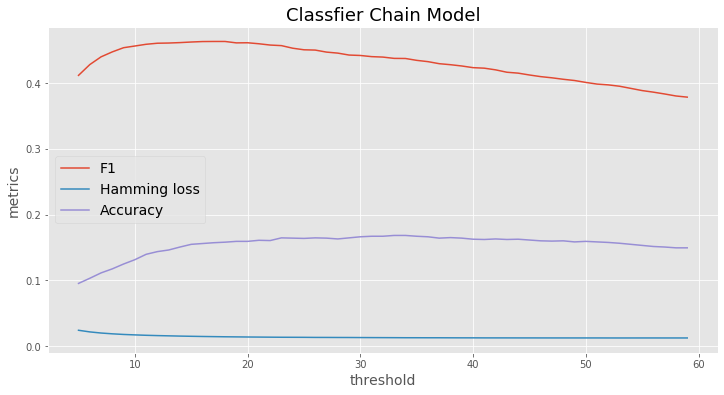

In [35]:
#for the next classifier we need to remove from y-train, y-test categories which equal 0 for all train samples
cc_classifier = ClassifierChain(LogisticRegression(solver='warn'))
cc_classifier.fit(X_train, y_train)
cc_predictions_proba = cc_classifier.predict_proba(X_test)
#for plotting metrics as a function of threashold
th = []
f = []
ham = []
ac = []
for t in range (5,60): # threshold value
    y_pred_new = (cc_predictions_proba >= t/100).astype(int)
#     print("t =" ,t/100)
#     print("Accuracy = ",accuracy_score(y_test,y_pred_new))
#     print("F1 = ",f1_score(y_test,y_pred_new, average="micro"))
#     print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classfier Chain Model", fontsize = 18)
plt.show()

In [36]:
# using classifier chains
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)

In [38]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,predictions.toarray())
Micro_Precision = precision_score(y_test,predictions, average='micro')
Micro_Recall = recall_score(y_test,predictions, average='micro')
Micro_F1 = f1_score(y_test,predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,predictions, average='macro')
Macro_Recall = recall_score(y_test,predictions, average='macro')
Macro_F1 = f1_score(y_test,predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,predictions)
Ranking_loss = label_ranking_loss(y_test, predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, predictions.toarray())
Jaccard_score = jaccard_score(y_test, predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, predictions, average='macro')
print("ClassifierChain Accuracy = ",Accuracy)
print("ClassifierChain Micro_Precision = ",Micro_Precision)
print("ClassifierChain Micro_Recall = ",Micro_Recall)
print("ClassifierChain Micro_F1 = ",Micro_F1)
print("ClassifierChain Micro_Average_Prec = ",Micro_Average_Prec)
print("ClassifierChain Macro_Precision = ",Macro_Precision)
print("ClassifierChain Macro_Recall = ",Macro_Recall)
print("ClassifierChain Macro_F1 = ",Macro_F1)
print("ClassifierChain Macro_Average_Prec = ",Macro_Average_Prec)
print("ClassifierChain Samples_Average_Prec = ",Samples_Average_Prec)
print("ClassifierChain Weighted_Average_Prec = ",Weighted_Average_Prec)
print("ClassifierChain Hamming_loss = ",Hamming_loss)
print("ClassifierChain Ranking_loss = ",Ranking_loss)
print("ClassifierChain Micro_Roc_auc = ",Micro_Roc_auc)
print("ClassifierChain Coverage_error = ",Coverage_error)
print("ClassifierChain label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("ClassifierChain Jaccard_score = ",Jaccard_score)
print("ClassifierChain Jaccard_score_macro = ",Jaccard_score_macro)
Eval6 = ['ClassifierChain',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval6)

ClassifierChain Accuracy =  0.15936091765669808
ClassifierChain Micro_Precision =  0.6890862944162437
ClassifierChain Micro_Recall =  0.2828125
ClassifierChain Micro_F1 =  0.4010339734121123
ClassifierChain Micro_Average_Prec =  0.2055258604398691
ClassifierChain Macro_Precision =  0.49198352623252767
ClassifierChain Macro_Recall =  0.1855920788931768
ClassifierChain Macro_F1 =  0.2445877821023027
ClassifierChain Macro_Average_Prec =  0.1449942342296029
ClassifierChain Samples_Average_Prec =  0.29229577939520457
ClassifierChain Weighted_Average_Prec =  0.23594801927873865
ClassifierChain Hamming_loss =  0.012537391882386588
ClassifierChain Ranking_loss =  0.6842109116381492
ClassifierChain Micro_Roc_auc =  0.6404451113841965
ClassifierChain Coverage_error =  128.07046292503074
ClassifierChain label_ranking_average_precision_score =  0.2922957793952051
ClassifierChain Jaccard_score =  0.2879123300569429
ClassifierChain Jaccard_score_macro =  0.16545569461666443


# 3.5. Multiple Binary Classifications - (One Vs Rest Classifier)


In [ ]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
# Training logistic regression model on train data
LogReg_pipeline.fit(X_train,y_train )
# calculating test accuracy
Logprediction = LogReg_pipeline.predict(X_test)

In [ ]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,Logprediction)
Micro_Precision = precision_score(y_test,Logprediction, average='micro')
Micro_Recall = recall_score(y_test,Logprediction, average='micro')
Micro_F1 = f1_score(y_test,Logprediction, average='micro')
Micro_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='micro')
Macro_Precision = precision_score(y_test,Logprediction, average='macro')
Macro_Recall = recall_score(y_test,Logprediction, average='macro')
Macro_F1 = f1_score(y_test,Logprediction, average='macro')
Macro_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='macro')
Samples_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='samples')
Weighted_Average_Prec = average_precision_score(y_test.toarray(), Logprediction, average='weighted')
Hamming_loss = hamming_loss(y_test,Logprediction)
Ranking_loss = label_ranking_loss(y_test, Logprediction)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.toarray().ravel(), Logprediction.ravel())
Micro_Roc_auc = auc(fpr["micro"], tpr["micro"])
Coverage_error = coverage_error(y_test.toarray(), Logprediction)
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test.toarray(), Logprediction)
Jaccard_score = jaccard_score(y_test, Logprediction, average='samples')
Jaccard_score_macro = jaccard_score(y_test, Logprediction, average='macro')
print("OneVsRestClassifier_LogisticRegression Accuracy = ",Accuracy)
print("OneVsRestClassifier_LogisticRegression Micro_Precision = ",Micro_Precision)
print("OneVsRestClassifier_LogisticRegression Micro_Recall = ",Micro_Recall)
print("OneVsRestClassifier_LogisticRegression Micro_F1 = ",Micro_F1)
print("OneVsRestClassifier_LogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Macro_Precision = ",Macro_Precision)
print("OneVsRestClassifier_LogisticRegression Macro_Recall = ",Macro_Recall)
print("OneVsRestClassifier_LogisticRegression Macro_F1 = ",Macro_F1)
print("OneVsRestClassifier_LogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Hamming_loss = ",Hamming_loss)
print("OneVsRestClassifier_LogisticRegression Ranking_loss = ",Ranking_loss)
print("OneVsRestClassifier_LogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("OneVsRestClassifier_LogisticRegression Coverage_error = ",Coverage_error)
print("OneVsRestClassifier_LogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score = ",Jaccard_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval7 = ['OneVsRestClassifier_LogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval7)

In [ ]:
df = pd.DataFrame(Evals, columns=['Classifier','Accuracy','Micro_Pre','Micro_Recall','Micro_F1','Micro_Avg_Prec',
         'Macro_Prec','Macro_Recall','Macro_F1','Macro_Avg_Prec','Samples_Avg_Prec','Weighted_Avg_Prec','Hamming_loss',
         'Ranking_loss','Micro_Roc_auc','Coverage_error','label_ranking_avg_prec_score','Jaccard_score','Jaccard_score_macro'])
df

In [ ]:
# Print the confusion matrix
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
#print(multilabel_confusion_matrix(y_test, Logprediction))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, Logprediction))

In [ ]:
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
def print_roc(y_true, y_scores):
        '''
        Prints the ROC for this model.
        '''
        fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), y_scores.ravel())
        auc_score = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% auc_score)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show() 
print_roc(y_test, Logprediction)

In [ ]:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [ ]:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()